In [1]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
with open('results/text_embeddings_bs2_aug.npy', 'rb') as f:
    texts_embeds_aug = np.load(f)
    
import numpy as np
with open('results/image_embeddings_bs2_aug.npy', 'rb') as f:
    images_embeds_aug = np.load(f)
    
with open('results/text_embeddings_bs2_raw.npy', 'rb') as f:
    texts_embeds_raw = np.load(f)
    
import numpy as np
with open('results/image_embeddings_bs2_raw.npy', 'rb') as f:
    images_embeds_raw = np.load(f)

In [9]:
my_file = open("results/names_bs2_raw.txt", "r")
  
# reading the file
names_raw = my_file.read().split('\n')

In [12]:
images_embeds_raw[0].shape

(300,)

In [10]:
from scipy import spatial

In [23]:
sims_img = []
for i in range(texts_embeds_raw.shape[0]):
    sim_i = []
    for j in range(images_embeds_aug.shape[0]):
        sim_i.append(spatial.distance.cosine(images_embeds_aug[i], 
                                             texts_embeds_aug[j]))
    sims_img.append(sim_i)

In [24]:
sims_img

[[1.0126808118075132,
  1.0074902926571667,
  1.0361116975545883,
  1.0330275632441044,
  1.0322099030017853,
  1.0305476542562246,
  1.0400971285998821,
  1.043576419353485,
  1.0399604812264442,
  1.0387862026691437,
  1.031247055158019,
  1.0282607655972242,
  1.045750018209219,
  1.0386901199817657,
  1.0384901724755764,
  1.0395506098866463,
  1.043102242052555,
  1.0466147027909756,
  1.0400900095701218,
  1.0441445484757423,
  1.0379556193947792,
  1.039590034633875,
  1.0383592993021011,
  1.0401950366795063,
  1.0353487767279148,
  1.0445691384375095,
  1.043922770768404,
  1.0362823978066444,
  1.035453174263239,
  1.0393759831786156,
  1.0382682867348194,
  1.0423627942800522,
  1.0391347855329514,
  1.0341589897871017,
  1.0394582115113735,
  1.0336704477667809,
  1.0307957511395216,
  1.0408282801508904,
  1.043538860976696,
  1.0394633524119854,
  1.030219692736864,
  1.0392073467373848,
  1.0348269678652287,
  1.0330038517713547,
  1.039769284427166,
  1.037205670028925,

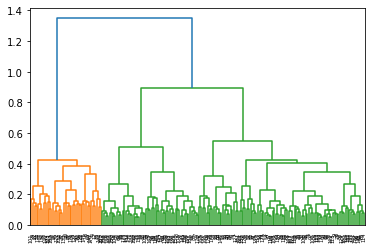

In [26]:
dendrogram = sch.dendrogram(sch.linkage(images_embeds_raw, method = 'ward'))
plt.show()

In [ ]:
all_raw = [images_embeds_raw]

In [48]:
cluster_model = AgglomerativeClustering(affinity = 'cosine', linkage = 'average', n_clusters=5)
#cluster_model.fit(images_embeds_raw)

In [29]:
labels = cluster_model.fit_predict(images_embeds_raw)

In [49]:
labels_txt = cluster_model.fit_predict(texts_embeds_raw)

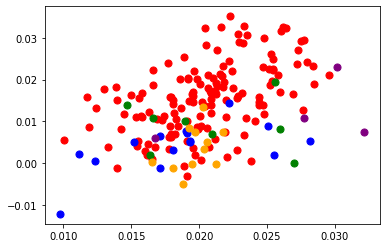

In [30]:
plt.scatter(images_embeds_raw[labels==0, 0], images_embeds_raw[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(images_embeds_raw[labels==1, 0], images_embeds_raw[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(images_embeds_raw[labels==2, 0], images_embeds_raw[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(images_embeds_raw[labels==3, 0], images_embeds_raw[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(images_embeds_raw[labels==4, 0], images_embeds_raw[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

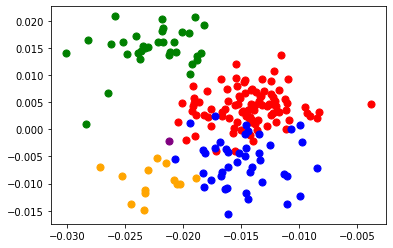

In [50]:
plt.scatter(texts_embeds_raw[labels_txt==0, 0], texts_embeds_raw[labels_txt==0, 1], s=50, marker='o', color='red')
plt.scatter(texts_embeds_raw[labels_txt==1, 0], texts_embeds_raw[labels_txt==1, 1], s=50, marker='o', color='blue')
plt.scatter(texts_embeds_raw[labels_txt==2, 0], texts_embeds_raw[labels_txt==2, 1], s=50, marker='o', color='green')
plt.scatter(texts_embeds_raw[labels_txt==3, 0], texts_embeds_raw[labels_txt==3, 1], s=50, marker='o', color='purple')
plt.scatter(texts_embeds_raw[labels_txt==4, 0], texts_embeds_raw[labels_txt==4, 1], s=50, marker='o', color='orange')

plt.show()

In [101]:
lab_0 = np.array(names_raw[:-1])[labels_txt==0]
lab_1 = np.array(names_raw[:-1])[labels_txt==1]
lab_2 = np.array(names_raw[:-1])[labels_txt==2]
lab_3 = np.array(names_raw[:-1])[labels_txt==4]

In [102]:
lab_3.shape

(13,)

In [131]:
import re
divided = True
text_path = '/data/burenko/datasets/pet-ct' + '/' + lab_3[0] + '.txt.txt'
with open(text_path) as f:
    text = f.read().rstrip().replace('\n', ' ')
    text = re.sub( r'[\(\)]', '', text).replace('  ', ' ')
    
titles = ['Пол:', '{}.*?{}'.format('Область головы', 'шеи:'),
'Органы грудной клетки:', 'Органы брюшной полости:', 'Органы малого таза:',
'Костная система:', 'Диагноз по МКБ-10:']
last_title = 'Выполнение диагностической услуги:'

if divided:
    divided_text = []
    for i in range(len(titles)):
        if i < len(titles)-1:
            
            pat = re.compile('{}(.*){}'.format(titles[i], titles[i+1]))
        else:
            pat = re.compile('{}(.*){}'.format(titles[i], last_title))
        sent = pat.findall(text)
        divided_text.append(''.join(sent).strip())

In [130]:
divided_text[-1]

'{С43.5} Злокачественная меланома туловища {Открыт } Заключение: По данным ПЭТ-КТ с 18 Е-ФДГ - специфической метаболически активной ткани на момент исследования не выявлено. Локализация первичного очага: ДР Совпадение с направляемым диагнозом в направлении по локализации первичного очага : недостаточно данных Первично-множественный рак: Нет М5 поражения: Нет Исследование: Первичное Эффективность лечения при повторных исследованиях: - Лучевая терапия: Нет Нейроэндокринная опухоль{негативный вариант: Нет Химиотерапия: Нет \x0cОперативные вмешательства: Да Т:х N: x M: x Визуализация: после лечения Гистология: полиморфноклеточная меланома'